# Part I: Overview of Multiclass Classification with Binary Logistic Regression

Multiclass Logistic Regression is a technique for categorizing samples into one of three or more classes. While logistic regression is inherently designed for binary classification, it can be extended to handle multiclass problems using techniques such as the **One vs. All** and **All-Pairs** approaches. Both methods leverage binary logistic regression classifiers for making multiclass predictions, but they employ them in fundamentally different ways. The **One vs. All** treats each class separately against all others, while the **All-Pairs** approach trains a binary classifier for every pair of classes and combining their outputs. For binary logistic regression, the sigmoid function is used for representation, outputting probabilites and defining the decision boundary at 0.5. The log loss function measures the difference between predicted probabilities and actual labels, guiding optimization through stochastic gradient descent (SGD). Training continues until either a maximum of 1000 epochs is reached or the convergence threshold of $1 \times 10^4$ is met.


## Binary Logistic Regression Math 
Logistic Regression uses the sigmoid function, which is defined as follows:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
where z is $\langle w,x \rangle$
This function takes in values of $X = \mathbb{R}^d$ and outputs continuous values in [0,1] that correspond to probabilities that are used to classify the points as $Y$ = {1, -1}.

The decision boundary based on this classifier is still $\langle w,x \rangle = 0$ and corresponds to a probability of 50%.

Now moving on to the loss for logisitic regression, in the binary case, log loss is as follows:
$$
\ell(h_{\mathbf{w}}, (\mathbf{x}, y)) = \log(1 + \exp(-y \langle \mathbf{w}, \mathbf{x} \rangle))
$$

This loss function penalizes the degree of wrongness in the case of misclassification.

Log loss is also convex, which moves us onto the optimization of the loss function. The optimization is done according to empirical risk minimization, which aims to find the hypothesis within the hypothesis class that minimizes the expected loss over all available data. In other words, ERM selects the hypothesis that produces the lowest average loss on the entire dataset. Since log-loss is convex, it is known that there is at most one global minimum, which would be where the loss is the smallest. 
In order to find this minimima, the gradients of $L(w)$ are computed with respect to each weight $w_j$. This method, called gradient descent, is used to iteratively minimize the loss function by adjusting the model parameters in the direction that reduces loss. Specifically, the weights are updated iteratively as follows:

$$
w_j = w_j - \alpha \frac{\partial L}{\partial w_j}
$$

$\alpha$ in this equation is the learning rate, which controls the size of the steps taken during gradient descent to update model parameters. It is important to select this parameter carefully because an overy large $\alpha$ can cause the model to overshoot the optimal values, while an overly small $\alpha$ can result in slow convergence or getting stuck in local minima.

## Binary Logistic Regression Pseudocode

1. **Initialize Parameters**:
   - Initialize weights `W` as a vector of small random values or zeros.
   - Initialize bias `b` as a small random value or zero.

2. **Sigmoid Function**:
   ```python
   def sigmoid(z):
       return 1 / (1 + exp(-z))

      z = W * X + b
      y_hat = sigmoid(z)

      # Compute loss
      loss = - (1 / m) * sum(y * log(y_hat) + (1 - y) * log(1 - y_hat))

      # Compute gradients
      dW = (1 / m) * X.T * (y_hat - y)  # Gradient of loss with respect to W
      db = (1 / m) * sum(y_hat - y)     # Gradient of loss with respect to b

      # Update parameters
      W = W - learning_rate * dW
      b = b - learning_rate * db

      def predict(X_new):
         z_new = W * X_new + b
         y_new_hat = sigmoid(z_new)

         if y_new_hat >= 0.5:
            return 1
         else:
            return 0



## All-Pairs

1. **Training**

   In the all-pairs approach for multi-class classification, multiple binary logistic regression models are trained for each pair of classes. Here’s the math involved:

   The total number of unique pairs of classes for $K$ classes is:

   $$\text{Number of pairs} = \binom{K}{2} = \frac{K(K - 1)}{2}$$

   For each pair of classes $(C_i, C_j)$, we train a binary logistic regression model to distinguish between data points in $C_i$ and $C_j$.

2. **Probability Estimation**
   The probability that a data point $x$ belongs to class $C_i$ rather than $C_j$ is given by:

   $$P(y = 1 | x; \theta^{(i, j)}) = \frac{1}{1 + e^{-\theta^{(i, j) \top} x}}$$

   where $ \theta^{(i, j)}$ is the parameter vector specific to the classifier for classes $C_i$ and $C_j$.


3. **Pseudocode**

   #### Train method:
   **Input**:  
      - Training data  $X$ (features) and $Y$ (labels)  
      - Binary logistic regression model

   **Steps**:
      1. **Validate input data** to ensure that $X $ and $Y$ are correctly formatted and consistent.
      2. **Create all possible class pairs** $(C_i, C_j)$ where $C_i < C_j$. This results in the set of class pairs for multi-class classification.
      3. **For each pair of classes** $(C_i, C_j)$:
         - Create a **mask** where $Y$ is either $C_i$ or $C_j$. .
         - **Filter** the training data $X$ and labels \( Y \) using the mask to get the sub-dataset $S_X$ and corresponding labels $S_Y$.
         - **Convert** $S_Y$ to binary values $[1, 0]$, where data points from $C_i$ are labeled 1 and those from $C_j$ are labeled 0.
      4. **Initialize and train** a binary logistic regression classifier using $S_X$ and the binary $S_Y$ labels.
      5. **Store** the trained classifier for later use in the prediction phase.

   ### Predict method:
   **Input**:  
      - Training data $X$ (features) and $Y$ (labels)  
      - Binary logistic regression model

   **Steps**:
      1. **Validate input data** to ensure that $X$ and $Y$ are correctly formatted and consistent. 
      2. **Initialize a vote array** with zeros to store votes for each class for each sample in $X$. 
      3. **For each pair of classes** $(C_i, C_j)$ and their respective classifiers: 
         - Use the classifier to **predict binary labels** (either 1 or 0).
         - If the predicted label is 1, **add a vote to $C_i$**. 
         - If the predicted label is 0, **add a vote to $C_j$**.
      4. **For each sample in $X$**, assign the **class label** corresponding to the class with the highest vote count. 
      5. **Return** the predicted class label for each sample.

## One-vs-all Algorithm


One-vs-all is an approach to multiclass classification that converts a multiclass problem into multiple binary classification problems. The process involves first creating a separate binary classifier for each class in the dataset. Each classifier treats the class as the "positive" class and all the other classes as the "negative" class. For a given data point, we run each of these binary classification algorithms and output the class that corresponds to the highest predicted probability. 


1. **Training**

  In the one-vs-all approach for multi-class classification, multiple binary logistic regression models are trained, one for each class. Here’s the math involved:

   For $K$ classes, we train $K$ binary classifiers. Each classifier $i$ is trained to distinguish between the data points in class $C_i$ and all other classes.

   The binary labels for the classifier corresponding to class $C_i$ are:
    $$y = 
            \begin{cases}
                1 & \text{if} \; x \; \text{if the data point belongs to class $C_{i}$} \; \\
                0 & \text{if} \; x \; \text{otherwise} \; 
            \end{cases}$$
   
2. **Probability Estimation**

The probability that a data point $x$ belongs to class $C_i$ is given by:

   $$P(y = 1 | x; \theta^{(i, j)}) = \frac{1}{1 + e^{-\theta^{(i, j) \top} x}}$$

   where $\theta^{(i)}$ is the parameter vector specific to the classifier for class $C_i$.


3. **Pseudocode**

   #### Train method:
   **Input**:  
      - Training data  $X$ (features) and $Y$ (labels)  
      - Binary logistic regression model

   **Steps**:

      1. $\text{Initialize an empty list, } \textit{models}, \text{to store each class's logistic regression model}$ <br />
      2. $\text{For each class } i \text{ in range } 1 \text{ to } k:$ <br />
         $\quad$ a. $\text{Create a new binary label vector } y_i \text{ where:}$ <br />
         $\quad \quad$ - $y_i[j] = 1$ $\text{ if } y[j] = i \text{ (current class)}$ <br />
         $\quad \quad$ - $y_i[j] = 0$ $\text{ otherwise (all other classes)}$ <br />
         $\quad$ b. $\text{Initialize and train a logistic regression model } model_i \text{ using } {\bf X} \text{ and } y_i$ <br />
         $\quad$ c. $\text{Store } model_i \text{ in the list } \textit{models}$ <br />

     **Output**:
     A list of $K$ trained binary classifiers.

   #### Predict method:
   **Input**:  
      - Test data $X$ (features) and $Y$ (labels)  
      - Trained binary classifiers

   **Steps**:
   1. **Validate input data** to ensure that $X$ and $Y$ are correctly formatted and consistent. 
   2. **Initialize a probability** array with shape $(N, K)$, where $N$ is the number of test samples and $K$ is the number of classes.
   3. **For each class** $C_i$ and its respective classifier:
         - Use the classifier to **predict probabilities** for all samples in $X$
         - Store the probabilities in the $i$-th column of the probability array.
   4. **For each sample in $X$**, assign the **class label** corresponding to the class with the highest highest probability. (np.argmax)
   5. **Return** the predicted class label for each sample.
      
      **Output**:
      An array of predicted class labels for each sample.

## Advantages and Disadvantages

### One-vs-All

**Advantages**:
1. **Simplicity**: The One-vs-All method is conceptually straightforward and easily-implemented. It decomposes the multiclass problem into multiple independent binary classification tasks, which can be handled by standard binary logistic regression classifiers.
2. **Efficiency**: For a dataset with $N$ classes, OvR requires training only $N$ classifiers, making it computationally efficient for smaller class sizes.

**Disadvantages**:
1. **Class Imbalance**: If the classes are imbalanced, some classifiers could be biased toward the dominant class, which could lead to suboptimal performance.
2. **Overlapping Classes**: This method assumes that each class is independent of the others. When classes have significant overlap, this can cause poor performance as the decision boundaries learned by each classifier may not capture the relationships between classes.
3. **Suboptimal Decision Boundaries**: Since the classifiers are trained independently, they may not effectively handle interactions between classes, potentially leading to decision boundaries that are not optimal for multiclass tasks.

### All-Pairs

**Advantages**:
1. **Higher Accuracy**: The All-Pairs method often performs better than One-vs-All, as it explicitly models pairwise relationships between classes. This method captures more complex decision boundaries that can lead to improved prediction accuracy.
2. **Captures Class Interactions**: Since All-Pairs trains on class pairs, All-Pairs can capture inter-class relationships more effectively, which is useful when classes have overlapping features.
3. **Improved Generalization**: Because the method takes into account pairwise comparisons, it can generalize better in situations where the decision boundaries are not easily separable by individual classifiers.

**Disadvantages**:
1. **Computational Complexity**: All-Pairs requires training $\binom{N}{2}$ classifiers, which grows with the number of classes. This can be impractical for problems with a large number of classes.
2. **Prediction Complexity**: During prediction, the outputs of many classifiers must be combined, which increases the complexity of the model and can lead to slower prediction times compared to One Vs. All.
3. **Scalability Issues**: While All-Pairs can offer better performance, the computational efficiency decreases as the number of classes increases, making it less scalable for large datasets.

# Part II: Model

## Binary Logistic Regression Implementation

In [84]:
import numpy as np

class BinaryLogisticRegression:
    def __init__(self, n_features, batch_size, conv_threshold = 1e-4, max_epochs = 100, random_state = None):
        """Initialize the binary logistic regression model.
        @param n_features: Number of features in the dataset, an integer.
        @param batch_size: Batch size for training, an integer.
        @param conv_threshold: Convergence threshold for training, a float.
        @return: None
        """
        if not isinstance(n_features, int) or n_features <= 0:
            raise ValueError("`n_features` must be a positive integer.")
        if not isinstance(batch_size, int) or batch_size <= 0:
            raise ValueError("`batch_size` must be a positive integer.")
        if not isinstance(conv_threshold, (int, float)) or conv_threshold <= 0:
            raise ValueError("`conv_threshold` must be a positive number.")
        if not isinstance(max_epochs, int) or max_epochs <= 0:
            raise ValueError("`max_epochs` must be a positive number.")
        if random_state is not None and not isinstance(random_state, int):
            raise ValueError("`random_state` must be an integer or None.")
            
        self.n_features = n_features
        self.weights = np.zeros(n_features + 1)  # extra element for bias
        self.alpha = 0.01
        self.batch_size = batch_size
        self.conv_threshold = conv_threshold
        self.max_epochs = max_epochs
        if random_state is not None:
            np.random.seed(random_state)

    def sigmoid(self, z):
        '''
        Perform sigmoid operation
        @params:
            z: the input to which sigmoid will be applied
        @return:
            an array with sigmoid applied elementwise.
        '''
        return 1 / (1 + np.exp(-z))

    def train(self, X, Y):
        '''self.epochs
        Trains the model using stochastic gradient descent
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return:
            num_epochs: integer representing the number of epochs taken to reach convergence
        '''
        if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
            raise TypeError("`X` and `Y` must be Numpy arrays.")
        if X.size == 0 or Y.size == 0:
            raise ValueError("`X` and `Y` cannot be empty.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("mismatch in # of samples between `X` and `Y`.")
        if X.shape[1] != self.n_features:
            raise ValueError(f"`X` must have {self.n_features} features.")
        if not np.array_equal(Y, Y.astype(int)) or not np.all((Y == 0) | (Y == 1)):
            raise ValueError("`Y` must contain binary labels (0 or 1).")

        # intializing values
        epochs = 0
        n_examples = X.shape[0]
        X_bias = np.hstack([X, np.ones((X.shape[0], 1))])  # Append bias term

        for i in range(self.max_epochs):
            # update # of epochs
            epochs +=1
            # acquire indices for shuffling of X and Y
            indices = np.arange(n_examples)
            np.random.shuffle(indices)
            X_bias = X_bias[indices]
            Y = Y[indices]
            # calc last epoch loss
            last_epoch_loss = self.loss(X, Y)
            # for the # of batches
            for i in range(0, n_examples, self.batch_size):
                X_batch = X_bias[i:i + self.batch_size]
                Y_batch = Y[i:i + self.batch_size]
                # reinitialize gradient to be 0s
                grad = np.zeros(self.weights.shape)
                # for each pair in the batch
                for x, y in zip(X_batch, Y_batch):
                    prediction = self.sigmoid(self.weights @ x) #np.dot(self.weights, x))
                    # gradient calculation
                    error = prediction - y
                    grad += error * x
                # update weights
                self.weights -= ((self.alpha * grad)/ self.batch_size)
            epoch_loss = self.loss(X, Y)
            if abs(epoch_loss - last_epoch_loss) < self.conv_threshold:
                break
        return epochs

    def loss(self, X, Y):
        '''
        Returns the total log loss on some dataset (X, Y), divided by the number of examples.
        @params:
            X: 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: 1D Numpy array containing the corresponding labels for each example
        @return:
            A float number which is the average loss of the model on the dataset
        '''
        if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
            raise TypeError("`X` and `Y` must be Numpy arrays.")
        if X.size == 0 or Y.size == 0:
            raise ValueError("`X` and `Y` cannot be empty.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("mismatch in # of samples between `X` and `Y`.")
        if X.shape[1] != self.n_features:
            raise ValueError(f"`X` must have {self.n_features} features.")
        if not np.array_equal(Y, Y.astype(int)) or not np.all((Y == 0) | (Y == 1)):
            raise ValueError("`Y` must contain binary labels (0 or 1).")
        
        X = np.hstack([X, np.ones((X.shape[0], 1))])  # Append bias term
        n_examples = X.shape[0]
        total_loss = 0

        for i in range(n_examples):
            # linear output (dot product)
            linear_output = X[i] @ self.weights.T  #np.dot(self.weights, X[i].T)
            # calc logistic loss for each sample
            y = 1 if Y[i] == 1 else -1
            logistic_loss = np.log(1 + np.exp(-y * linear_output))
            total_loss += logistic_loss
    
        return total_loss / n_examples
    
    def predict(self, X):
        '''
        Compute predictions based on the learned weigths and examples X
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
        @return:
            A 1D Numpy array with one element for each row in X containing the predicted class.
        '''
        if not isinstance(X, np.ndarray):
            raise TypeError("`X` must be a Numpy array.")
        if X.size == 0:
            raise ValueError("`X` cannot be empty.")
        if X.shape[1] != self.n_features:
            raise ValueError(f"`X` must have {self.n_features} features.")
            
        # multiply X by weights of model
        X = np.hstack([X, np.ones((X.shape[0], 1))])  # Append bias term
        predictions = self.sigmoid(X @ self.weights.T)
        return np.where(predictions >= 0.5, 1, 0)
        
    def predict_probs(self, X):
        '''
        Compute prediction probabilities based on the learned weigths and examples X
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
        @return:
            an array with sigmoid applied elementwise.
        '''
        if not isinstance(X, np.ndarray):
            raise TypeError("`X` must be a Numpy array.")
        if X.size == 0:
            raise ValueError("`X` cannot be empty.")
        if X.shape[1] != self.n_features:
            raise ValueError(f"`X` must have {self.n_features} features.")
            
        X = np.hstack([X, np.ones((X.shape[0], 1))])  # Append bias term
        predictions = self.sigmoid(X @ self.weights.T)
        return predictions

    def accuracy(self, X, Y):
        '''
        Outputs the accuracy of the trained model on a given testing dataset X and labels Y.
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return:
            a float number indicating accuracy (between 0 and 1)
        '''
        if not isinstance(X, np.ndarray) or not isinstance(Y, np.ndarray):
            raise TypeError("`X` and `Y` must be Numpy arrays.")
        if X.size == 0 or Y.size == 0:
            raise ValueError("`X` and `Y` cannot be empty.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("mismatch in # of samples between `X` and `Y`.")
        if X.shape[1] != self.n_features:
            raise ValueError(f"`X` must have {self.n_features} features.")

        predictions = self.predict(X)
        accuracy = np.mean(predictions == Y)
        return accuracy




## All-Pairs Implementation

In [90]:
import numpy as np
class AllPairsLogisticRegression:
    def __init__(self, n_classes, binary_classifier_class, n_features, batch_size, max_epochs = 100, conv_threshold = 1e-6, random_state=None):
        """
        Initialize the all-pairs logistic regression model approach.
        @param n_classes: Number of classes in the dataset, an integer.
        @param binary_classifier_class: Class for binary logistic regression, a class object.
        @param n_features: Number of features in the dataset, an integer.
        @param batch_size: Batch size for training the binary classifiers, an integer.
        @param conv_threshold: Convergence threshold for training, a float.
        @return: None
        """
        
        if not isinstance(n_classes, int) or n_classes <= 1:
            raise ValueError("`n_classes` must be an integer greater than 1.")
        if not isinstance(max_epochs, int) or max_epochs <= 0:
            raise ValueError("`epochs` must be an integer greater than 0.")
        if not callable(binary_classifier_class):
            raise TypeError("`binary_classifier_class` must be a callable class.")
        if not isinstance(n_features, int) or n_features <= 0:
            raise ValueError("`n_features` must be a positive integer.")
        if not isinstance(batch_size, int) or batch_size <= 0:
            raise ValueError("`batch_size` must be a positive integer.")
        if not isinstance(max_epochs, int) or max_epochs <= 0:
                raise ValueError("`max_epochs` must be a positive number.")
        if not isinstance(conv_threshold, (int, float)) or conv_threshold <= 0:
            raise ValueError("`conv_threshold` must be a positive number.")
        
        self.n_classes = n_classes
        self.classifiers = {}
        self.n_features = n_features
        self.batch_size = batch_size
        self.max_epochs = max_epochs
        self.conv_threshold = conv_threshold
        self.binary_classifier_class = binary_classifier_class
        self.random_state = random_state

    def train(self, X, Y):
        """
        Train the all-pairs logistic regression model by training binary classifiers
        for each pair of classes in the dataset.
        @param X: Input features of the dataset, a numpy array of shape (n_samples, n_features).
        @param Y: Labels of the dataset, a numpy array of shape (n_samples).
        @return: None
        """
        if X.size == 0 or Y.size == 0:
            raise ValueError("Input data `X` and labels `Y` cannot be empty.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Mismatch in number of samples between `X` and `Y`.")
        if np.any((Y < 0) | (Y >= self.n_classes)):
            raise ValueError(f"Labels in `Y` must be in the range [0, {self.n_classes - 1}].")
        unique_classes = np.arange(self.n_classes)
        pairs = [(class_i, class_j) for class_i in unique_classes for class_j in unique_classes if class_i < class_j]

        for class_i, class_j in pairs:
            mask = (Y == class_i) | (Y == class_j)
            SX = X[mask]
            SY = np.where(Y[mask] == class_i, 1, 0)
            classifier = self.binary_classifier_class(
                n_features=self.n_features,
                batch_size=self.batch_size,
                max_epochs=self.max_epochs, random_state=self.random_state,
                conv_threshold = self.conv_threshold
            )
            classifier.train(SX, SY)
            self.classifiers[(class_i, class_j)] = classifier

    def predict(self, X):
        """
        Predict the class labels for the input data using the trained classifiers.
        @param X: Input features to classify, a numpy array of shape (n_samples, n_features).
        @return: Predicted class labels, a numpy array of shape (n_samples).
        """
        if X.size == 0:
            raise ValueError("Input data `X` cannot be empty.")
        if X.shape[1] != self.n_features:
            raise ValueError(f"`X` must have {self.n_features} features.")
        
        n_samples = X.shape[0]
        votes = np.zeros((n_samples, self.n_classes), dtype=int)
        for (class_i, class_j), classifier in self.classifiers.items():
            predictions = classifier.predict(X)
            votes[:, class_i] += (predictions == 1)
            votes[:, class_j] += (predictions == 0)
        return np.argmax(votes, axis=1)

    def accuracy(self, X, Y):
        """
        Calculate the accuracy of the model on the input data and labels by finding ratio of correct predictions to total samples.
        @param X: Input features of the dataset, a numpy array of shape (n_samples, n_features).
        @param Y: True labels of the dataset, a numpy array of shape (n_samples).
        @return: Accuracy of the model as a float between 0 and 1.
        """
        if X.size == 0 or Y.size == 0:
            raise ValueError("Input data `X` and labels `Y` cannot be empty.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Mismatch in number of samples between `X` and `Y`.")
        
        predictions = self.predict(X)
        correct_predictions = np.sum(predictions == Y)
        return correct_predictions / len(Y)


## One-vs-all Implementation

In [93]:
import numpy as np

class OneVsAllLogisticRegression:
    def __init__(self, n_classes, binary_classifier_class, n_features, batch_size, max_epochs = 100, conv_threshold = 1e-6, random_state = None):
        """
        Initialize the One-vs-All logistic regression model.
        @param n_classes: Number of classes in the dataset, an integer.
        @param binary_classifier_class: Class for binary logistic regression, a class object.
        @param n_features: Number of features in the dataset, an integer.
        @param batch_size: Batch size for training the binary classifiers, an integer.
        @param conv_threshold: Convergence threshold for training, a float.
        @return: None
        """

        if not isinstance(n_classes, int) or n_classes <= 1:
            raise ValueError("`n_classes` must be an integer greater than 1.")
        if not isinstance(max_epochs, int) or max_epochs <= 0:
            raise ValueError("`epochs` must be an integer greater than 0.")
        if not callable(binary_classifier_class):
            raise TypeError("`binary_classifier_class` must be a callable class.")
        if not isinstance(n_features, int) or n_features <= 0:
            raise ValueError("`n_features` must be a positive integer.")
        if not isinstance(batch_size, int) or batch_size <= 0:
            raise ValueError("`batch_size` must be a positive integer.")
        if not isinstance(max_epochs, int) or max_epochs <= 0:
                raise ValueError("`max_epochs` must be a positive number.")
        if not isinstance(conv_threshold, (int, float)) or conv_threshold <= 0:
            raise ValueError("`conv_threshold` must be a positive number.")
        
        self.n_classes = n_classes
        self.classifiers = {}  
        self.n_features = n_features
        self.batch_size = batch_size
        self.max_epochs = max_epochs 
        self.conv_threshold = conv_threshold
        self.binary_classifier_class = binary_classifier_class
        self.random_state = random_state
        

    def train(self, X, Y):
        """
        Train the One-vs-All logistic regression model by training one binary classifier
        for each class in the dataset.
        @param X: Input features of the dataset, a numpy array of shape (n_samples, n_features).
        @param Y: Labels of the dataset, a numpy array of shape (n_samples,).
        @return: None
        """

        if X.size == 0 or Y.size == 0:
            raise ValueError("Input data `X` and labels `Y` cannot be empty.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Mismatch in number of samples between `X` and `Y`.")
        if np.any((Y < 0) | (Y >= self.n_classes)):
            raise ValueError(f"Labels in `Y` must be in the range [0, {self.n_classes - 1}].")
        
        for class_i in range(self.n_classes):
            # Create binary labels: 1 for the current class, 0 for others
            binary_labels = np.where(Y == class_i, 1, 0)
            classifier = self.binary_classifier_class(
                n_features=self.n_features,
                batch_size=self.batch_size,
                max_epochs=self.max_epochs, random_state=self.random_state,
                conv_threshold = self.conv_threshold
            )
            classifier.train(X, binary_labels)
            self.classifiers[class_i] = classifier

    def predict(self, X):
        """
        Predict the class labels for the input data using the trained classifiers.
        @param X: Input features to classify, a numpy array of shape (n_samples, n_features).
        @return: Predicted class labels, a numpy array of shape (n_samples,).
        """

        if X.size == 0:
            raise ValueError("Input data `X` cannot be empty.")
        if X.shape[1] != self.n_features:
            raise ValueError(f"`X` must have {self.n_features} features.")


        n_samples = X.shape[0]
        scores = np.zeros((n_samples, self.n_classes))

        for class_i, classifier in self.classifiers.items():
            # Get probabilities for the current class
            scores[:, class_i] = classifier.predict_probs(X)

        # Select the class with the highest probability/score for each sample
        return np.argmax(scores, axis=1)

    def accuracy(self, X, Y):
        """
        Calculate the accuracy of the model on the input data and labels.
        @param X: Input features of the dataset, a numpy array of shape (n_samples, n_features).
        @param Y: True labels of the dataset, a numpy array of shape (n_samples,).
        @return: Accuracy of the model as a float between 0 and 1.
        """
        if X.size == 0 or Y.size == 0:
            raise ValueError("Input data `X` and labels `Y` cannot be empty.")
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Mismatch in number of samples between `X` and `Y`.")
        
        preds = self.predict(X)
        acc = np.mean(preds == Y)
        return acc

# Part III: Check Model

## Test Binary Logistic Regression

In [89]:
import unittest
import numpy as np

class TestBinaryLogisticRegression(unittest.TestCase):

    def setUp(self):
        """Initialize common test parameters."""
        self.n_features = 1
        self.batch_size = 1
        self.conv_threshold = 1e-6
        self.max_epochs = 1000
        self.model = BinaryLogisticRegression(
            n_features=self.n_features,
            batch_size=self.batch_size,
            conv_threshold=self.conv_threshold,
            max_epochs = self.max_epochs
        )

    def test_loss_initialization(self):
        """Test that the initial loss is computed correctly."""
        np.random.seed(0)
        x = np.array([[1], [2], [3], [4], [5], [1.2]])
        y = np.array([0, 0, 1, 1, 1, 0])
        initial_loss = self.model.loss(x, y)
        self.assertAlmostEqual(initial_loss, 0.693, places=3)

    def test_sigmoid(self):
        """Test that sigmoid outputs correct calculations."""
        # small positive input
        z = 1
        expected_output = 1 / (1 + np.exp(-z))
        output = self.model.sigmoid(z)
        self.assertAlmostEqual(output, expected_output, places=6)

        # small negative input
        z = -1
        expected_output = 1 / (1 + np.exp(-z))
        output = self.model.sigmoid(z)
        self.assertAlmostEqual(output, expected_output, places=6)

        # large positive input (ensure stability)
        z = 100
        expected_output = 1.0  # Sigmoid saturates to 1
        output = self.model.sigmoid(z)
        self.assertAlmostEqual(output, expected_output, places=6)

        # large negative input (ensure stability)
        z = -100
        expected_output = 0.0  # Sigmoid saturates to 0
        output = self.model.sigmoid(z)
        self.assertAlmostEqual(output, expected_output, places=6)

        # zero input
        z = 0
        expected_output = 0.5  # Sigmoid(0) = 0.5
        output = self.model.sigmoid(z)
        self.assertAlmostEqual(output, expected_output, places=6)

        # vector input
        z = np.array([-1, 0, 1])
        expected_output = 1 / (1 + np.exp(-z))
        output = self.model.sigmoid(z)
        np.testing.assert_array_almost_equal(output, expected_output, decimal=6)

    def test_training_and_predictions(self):
        """Test that the model learns correctly on training data."""
        x = np.array([[1], [2], [3], [4], [5], [1.2]])
        y = np.array([0, 0, 1, 1, 1, 0])

        self.model.train(x, y)
        predictions = self.model.predict(x)
        expected_predictions = np.array([0, 0, 1, 1, 1, 0])

        np.testing.assert_array_equal(predictions, expected_predictions)
        accuracy = self.model.accuracy(x, expected_predictions)
        self.assertAlmostEqual(accuracy, 1.0, places=2)

    def test_new_unseen_data(self):
        """Test the model on unseen data after training."""
        x_train = np.array([[1], [2], [3], [4], [5], [1.2]])
        y_train = np.array([0, 0, 1, 1, 1, 0])

        x_test = np.array([[1.5], [3.5]])
        y_test = np.array([0, 1])

        self.model.train(x_train, y_train)
        predictions = self.model.predict(x_test)
        np.testing.assert_array_equal(predictions, y_test)
        accuracy = self.model.accuracy(x_test, y_test)
        self.assertAlmostEqual(accuracy, 1.0, places=2)

    def test_gradient_calculation(self):
        """Test that the gradient is computed correctly."""
        weights = np.array([0.0, 0.0])  # init weights
        x_sample = np.array([1])  # single feature
        y_sample = 0

        z = weights[0] * x_sample[0] + weights[1]  # using weights and bias term
        prediction = 1 / (1 + np.exp(-z))
        gradient = (prediction - y_sample) * np.array([x_sample[0], 1])  # gradient for weight + bias
        expected_gradient = np.array([0.5, 0.5])  # manually computed gradient with zero weights

        np.testing.assert_allclose(gradient, expected_gradient, atol=0.01)

    def test_imbalanced_data(self):
        """Test behavior on an imbalanced dataset."""
        x = np.array([[1], [2], [3], [4], [5]])
        # imbalanced labels
        y = np.array([0, 0, 0, 0, 1])  
        epochs = self.model.train(x, y)
        predictions = self.model.predict(x)
        majority_class = 0
        self.assertGreaterEqual(np.sum(predictions == majority_class), 3)

    def test_non_separable_data(self):
        """Test behavior with non-linearly separable data."""
        x = np.array([[1], [2], [3], [4]])
        # Non-linearly separable
        y = np.array([0, 1, 0, 1]) 
        self.model.train(x, y)
        predictions = self.model.predict(x)
        accuracy = self.model.accuracy(x, y)
        # should be better than random guessing
        self.assertGreaterEqual(accuracy, 0.5)  
        self.assertLessEqual(accuracy, 1.0)

     # FOR TESTING EDGE CASES INVOLVING FORMATTING OF DATA
    def test_invalid_initialization(self):
        """Test invalid parameters during initialization."""
        # n_features
        with self.assertRaises(ValueError):
            BinaryLogisticRegression(n_features=-1, batch_size=1, conv_threshold=1e-3)
        with self.assertRaises(ValueError):
            BinaryLogisticRegression(n_features=0, batch_size=1, conv_threshold=1e-3)
        # batch_size
        with self.assertRaises(ValueError):
            BinaryLogisticRegression(n_features=2, batch_size=0, conv_threshold=1e-3)
        with self.assertRaises(ValueError):
            BinaryLogisticRegression(n_features=2, batch_size=-5, conv_threshold=1e-3)
        # conv_threshold
        with self.assertRaises(ValueError):
            BinaryLogisticRegression(n_features=2, batch_size=1, conv_threshold=-0.1)
        with self.assertRaises(ValueError):
            BinaryLogisticRegression(n_features=2, batch_size=1, conv_threshold=0)
    
    def test_invalid_train_inputs(self):
        """Test invalid training inputs for X and Y."""
        model = BinaryLogisticRegression(n_features=2, batch_size=1, conv_threshold=1e-3)
        valid_X = np.array([[1, 2], [3, 4], [5, 6]])
        valid_Y = np.array([0, 1, 1])
    
        # non-numpy inputs
        with self.assertRaises(TypeError):
            model.train([[1, 2], [3, 4]], valid_Y)
        with self.assertRaises(TypeError):
            model.train(valid_X, [0, 1, 1])
    
        # empty inputs
        with self.assertRaises(ValueError):
            model.train(np.array([]), valid_Y)
        with self.assertRaises(ValueError):
            model.train(valid_X, np.array([]))
    
        # mismatched samples
        with self.assertRaises(ValueError):
            model.train(valid_X, np.array([0, 1]))
    
        # invalid labels
        with self.assertRaises(ValueError):
            # 2 label is invalid
            model.train(valid_X, np.array([0, 1, 2]))  
    
    def test_invalid_predict_inputs(self):
        """Test invalid prediction inputs for X."""
        model = BinaryLogisticRegression(n_features=2, batch_size=1, conv_threshold=1e-3)
    
        # non-numpy inputs
        with self.assertRaises(TypeError):
            model.predict([[1, 2], [3, 4]])
    
        # empty inputs
        with self.assertRaises(ValueError):
            model.predict(np.array([]))
    
        # invlid feature dimensions
        with self.assertRaises(ValueError):
            # 3 features instead of 2
            model.predict(np.array([[1, 2, 3]]))  
    
    def test_invalid_loss_inputs(self):
        """Test invalid inputs for the loss function."""
        model = BinaryLogisticRegression(n_features=2, batch_size=1, conv_threshold=1e-3)
        valid_X = np.array([[1, 2], [3, 4], [5, 6]])
        valid_Y = np.array([0, 1, 1])
    
        # invalid feature dimensions
        with self.assertRaises(ValueError):
            model.loss(np.array([[1, 2, 3]]), valid_Y)
    
        # invalid labels
        with self.assertRaises(ValueError):
            # 2 label is invalid
            model.loss(valid_X, np.array([0, 1, 2])) 
    
    def test_invalid_accuracy_inputs(self):
        """Test invalid inputs for accuracy calculation."""
        model = BinaryLogisticRegression(n_features=2, batch_size=1, conv_threshold=1e-3)
        valid_X = np.array([[1, 2], [3, 4], [5, 6]])
        valid_Y = np.array([0, 1, 1])
    
        # mismatched samples
        with self.assertRaises(ValueError):
            model.accuracy(valid_X, np.array([0, 1]))
    
        # empty inputs
        with self.assertRaises(ValueError):
            model.accuracy(np.array([]), valid_Y)
        with self.assertRaises(ValueError):
            model.accuracy(valid_X, np.array([]))


if __name__ == "__main__":
    # Create a test loader
    loader = unittest.TestLoader()
    # Load only the tests from the current class
    suite = loader.loadTestsFromTestCase(TestBinaryLogisticRegression)
    # Create a test runner and run the selected suite
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite)

    
# if __name__ == "__main__":
#     # Use `unittest.main()` with arguments to avoid conflicts with Jupyter Notebook.
#     unittest.main(argv=[''], verbosity=2, exit=False)

test_gradient_calculation (__main__.TestBinaryLogisticRegression.test_gradient_calculation)
Test that the gradient is computed correctly. ... ok
test_imbalanced_data (__main__.TestBinaryLogisticRegression.test_imbalanced_data)
Test behavior on an imbalanced dataset. ... ok
test_invalid_accuracy_inputs (__main__.TestBinaryLogisticRegression.test_invalid_accuracy_inputs)
Test invalid inputs for accuracy calculation. ... ok
test_invalid_initialization (__main__.TestBinaryLogisticRegression.test_invalid_initialization)
Test invalid parameters during initialization. ... ok
test_invalid_loss_inputs (__main__.TestBinaryLogisticRegression.test_invalid_loss_inputs)
Test invalid inputs for the loss function. ... ok
test_invalid_predict_inputs (__main__.TestBinaryLogisticRegression.test_invalid_predict_inputs)
Test invalid prediction inputs for X. ... ok
test_invalid_train_inputs (__main__.TestBinaryLogisticRegression.test_invalid_train_inputs)
Test invalid training inputs for X and Y. ... ok
tes

## Test All-Pairs

In [91]:
import unittest
import numpy as np
import random

random.seed(0)
np.random.seed(0)

class TestAllPairsLogisticRegression(unittest.TestCase):
    def setUp(self):
        """Initialize common test parameters."""
        self.n_classes = 3
        self.n_features = 2
        self.batch_size = 1
        self.model = AllPairsLogisticRegression(
            n_classes=self.n_classes,
            binary_classifier_class=BinaryLogisticRegression,
            n_features=self.n_features,
            batch_size=self.batch_size,
            random_state=42
        )


    def test_all_classifiers_trained(self):
        """Test that all required binary classifiers are trained."""
        X = np.array([[1, 0], [0, 1], [-1, 0], [2, 0]])  # Data separable
        Y = np.array([2, 1, 0, 2])  # 3 classes: 0, 1, 2
        self.model.train(X, Y)
        unique_pairs = [(i, j) for i in range(3) for j in range(3) if i < j]
        self.assertEqual(len(self.model.classifiers), len(unique_pairs))
        
    def test_train_function(self):
        """Test the train function."""
        X = np.array([[1, 0], [0, 1], [-1, 0], [2, 0]])  # Data separable
        Y = np.array([2, 1, 0, 2])  # 3 classes: 0, 1, 2
        self.model.train(X, Y)
        self.assertTrue(len(self.model.classifiers) > 0)


    def test_train_creates_correct_classifiers_all_pairs(self):
        """Test that `train` creates one classifier for each pair of classes and trains it correctly."""
        X = np.array([[1, 0], [0, 1], [-1, 0], [2, 0]])  # Data separable
        Y = np.array([2, 1, 0, 2])  # 3 classes: 0, 1, 2

        # Train the model
        self.model.train(X, Y)

        # Check that the correct number of classifiers was created
        n_classes = len(np.unique(Y))
        expected_classifiers = n_classes * (n_classes - 1) // 2  # Number of class pairs
        self.assertEqual(len(self.model.classifiers), expected_classifiers)

        # Check each classifier's training data and predictions
        for class_i in range(n_classes):
            for class_j in range(class_i + 1, n_classes):
                # Get the binary classifier for this class pair
                classifier = self.model.classifiers[(class_i, class_j)]

                # Filter data for classes class_i and class_j
                mask = (Y == class_i) | (Y == class_j)
                X_pair = X[mask]
                Y_pair = Y[mask]

                # Convert labels to binary: class_i -> 1, class_j -> 0
                binary_labels = np.where(Y_pair == class_i, 1, 0)

                # Ensure the classifier's predictions match the binary labels
                predictions = classifier.predict(X_pair)
                np.testing.assert_array_equal(predictions, binary_labels)


    def test_accuracy(self):
        """Test the accuracy calculation on training data."""
        X = np.array([[1, 0], [0, 1], [-1, 0], [2, 0]])  # Data separable
        Y = np.array([2, 1, 0, 2])  # 3 classes: 0, 1, 2

        # Train the model
        self.model.train(X, Y)
        accuracy = self.model.accuracy(X, Y)
        self.assertAlmostEqual(accuracy, 1.0, places=2)

    def test_predict_on_unseen_data(self):
        """Test predictions on unseen testing data."""
        X_train = np.array([[1, 1], [-1, 1], [1, -1], [-1, -1]])
        Y_train = np.array([0, 1, 2, 1])  # 3 classes: 0, 1, 2

        X_test = np.array([[2, 2], [-2, -2], [3, 4], [8, -10]])
        Y_test = np.array([0, 1, 0, 2])  # Test on similar data

        # Train the model
        self.model.train(X_train, Y_train)

        # Predict on unseen data
        predictions = self.model.predict(X_test)

        # Check if predictions match true labels
        np.testing.assert_array_equal(predictions, Y_test)


    def test_train_empty_data(self):
        """Test that training with empty data raises an error."""
        X_empty = np.array([])
        Y_empty = np.array([])
        with self.assertRaises(ValueError):
            self.model.train(X_empty, Y_empty)
            
        
    def test_train_dimension_mismatch(self):
        """Test that training with mismatched dimensions raises an error."""
        X_mismatch = np.array([[1, 2], [3, 4]])  
        Y_mismatch = np.array([0])  
        with self.assertRaises(ValueError):
            self.model.train(X_mismatch, Y_mismatch)

    def test_invalid_binary_classifier_class(self):
        """Test that an invalid `binary_classifier_class` raises an error."""
        with self.assertRaises(TypeError):
            AllPairsLogisticRegression(
                n_classes=3,
                n_features=2,
                batch_size=1,
                epochs=100,
                binary_classifier_class="NotAClass",
                random_state=42
            )
            
    def test_non_separable_data(self):
        """Test the model on non-linearly separable data."""
        X_non_separable = np.array([
            [1, 2], [2, 1], [2, 2],
            [3, 4], [4, 3], [4, 4],
            [5, 6], [6, 5], [6, 6]
        ])
        Y_non_separable = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2]) 
        self.model.train(X_non_separable, Y_non_separable)
        accuracy = self.model.accuracy(X_non_separable, Y_non_separable)
        self.assertGreaterEqual(accuracy, 0.5)  
    
    # # -----------------
    # # Additional Tests
    # # -----------------

    def test_predict_correct_classes(self):
        """Test that `predict` returns the correct class labels."""
        X = np.array([[1, 1], [-1, 1], [1, -1], [-1, -1]])
        Y = np.array([0, 1, 2, 1]) 

        self.model.train(X, Y)

        predictions = self.model.predict(X)

        np.testing.assert_array_equal(predictions, Y)

    def test_accuracy_calculation(self):
        """Test that `accuracy` computes the correct value."""
        X = np.array([[1, 1], [-1, 1], [1, -1], [-1, -1]])
        Y = np.array([0, 1, 2, 1])  

        self.model.train(X, Y)

        acc = self.model.accuracy(X, Y)

        self.assertAlmostEqual(acc, 1.0)

    def test_invalid_n_classes(self):
        """Test that an invalid `n_classes` parameter raises an error."""
        with self.assertRaises(ValueError):
            AllPairsLogisticRegression(
                n_classes=0,  # Invalid
                binary_classifier_class=BinaryLogisticRegression,
                n_features=2,
                batch_size=1,
                random_state=42
            )

    def test_invalid_n_features(self):
        """Test that an invalid `n_features` parameter raises an error."""
        with self.assertRaises(ValueError):
            AllPairsLogisticRegression(
                n_classes=3,
                binary_classifier_class=BinaryLogisticRegression,
                n_features=-1,  # Invalid
                batch_size=1,
                random_state=42
            )

    def test_invalid_batch_size(self):
        """Test that an invalid `batch_size` parameter raises an error."""
        with self.assertRaises(ValueError):
            AllPairsLogisticRegression(
                n_classes=3,
                binary_classifier_class=BinaryLogisticRegression,
                n_features=2,
                batch_size=0,  # Invalid
                random_state=42
            )

    def test_invalid_epochs(self):
        """Test that an invalid `max_epochs` parameter raises an error."""
        with self.assertRaises(ValueError):
            AllPairsLogisticRegression(
                n_classes=3,
                binary_classifier_class=BinaryLogisticRegression,
                n_features=2,
                batch_size=1,
                max_epochs=-10,  # Invalid
                random_state=42
            )

    def test_train_empty_data(self):
        """Test that training with empty data raises an error."""
        X = np.array([])
        Y = np.array([])
        with self.assertRaises(ValueError):
            self.model.train(X, Y)


    def test_predict_invalid_dimensions(self):
        """Test that `predict` with invalid dimensions raises an error."""
        X = np.array([[1, 2, 3]])  
        with self.assertRaises(ValueError):
            self.model.predict(X)
    
    def test_train_dimension_mismatch(self):
        """Test that training with mismatched dimensions raises an error."""
        X = np.array([[1, 2], [3, 4]])
        Y = np.array([0])  # size mismatch
        with self.assertRaises(ValueError):
            self.model.train(X, Y)


if __name__ == "__main__":
    # Create a test loader
    loader = unittest.TestLoader()
    # Load only the tests from the current class
    suite = loader.loadTestsFromTestCase(TestAllPairsLogisticRegression)
    # Create a test runner and run the selected suite
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite)

# if __name__ == "__main__":
#     # Use `unittest.main()` with arguments to avoid conflicts with Jupyter Notebook.
#     unittest.main(argv=[''], verbosity=2, exit=False)


test_accuracy (__main__.TestAllPairsLogisticRegression.test_accuracy)
Test the accuracy calculation on training data. ... ok
test_accuracy_calculation (__main__.TestAllPairsLogisticRegression.test_accuracy_calculation)
Test that `accuracy` computes the correct value. ... ok
test_all_classifiers_trained (__main__.TestAllPairsLogisticRegression.test_all_classifiers_trained)
Test that all required binary classifiers are trained. ... ok
test_invalid_batch_size (__main__.TestAllPairsLogisticRegression.test_invalid_batch_size)
Test that an invalid `batch_size` parameter raises an error. ... ok
test_invalid_binary_classifier_class (__main__.TestAllPairsLogisticRegression.test_invalid_binary_classifier_class)
Test that an invalid `binary_classifier_class` raises an error. ... ok
test_invalid_epochs (__main__.TestAllPairsLogisticRegression.test_invalid_epochs)
Test that an invalid `max_epochs` parameter raises an error. ... ok
test_invalid_n_classes (__main__.TestAllPairsLogisticRegression.test

## Test One-vs-all

In [95]:
import unittest
import numpy as np


class TestOneVsAllLogisticRegression(unittest.TestCase):

    def setUp(self):
        """Initialize common test parameters."""
        self.n_classes = 3
        self.n_features = 2
        self.batch_size = 1
        self.model = OneVsAllLogisticRegression(
            n_classes=self.n_classes,
            binary_classifier_class=BinaryLogisticRegression,
            n_features=self.n_features,
            batch_size=self.batch_size,
            random_state=42
        )

    def test_train_creates_correct_classifiers(self):
        """Test that `train` creates one classifier per class and trains it correctly."""
        X = np.array([[1, 0], [0, 1], [-1, 0], [2, 0], [0,2], [-2,0]])  # Data separable
        Y = np.array([2, 1, 0, 2, 1, 0])  # 3 classes: 0, 1, 2

        # Train the model
        self.model.train(X, Y)

        # Check that the correct number of classifiers was created
        self.assertEqual(len(self.model.classifiers), self.n_classes)

        # Check that each classifier was trained with the correct binary labels
        for class_i, classifier in self.model.classifiers.items():
            binary_labels = np.where(Y == class_i, 1, 0)
            predictions = classifier.predict(X)
            np.testing.assert_array_equal(predictions, binary_labels)

    def test_predict_correct_classes(self):
        """Test that `predict` returns the correct class labels."""
        X = np.array([[1, 1], [-1, 1], [1, -1], [-1, -1]])
        Y = np.array([0, 1, 2, 1])  # 3 classes: 0, 1, 2

        # Train the model
        self.model.train(X, Y)

        # Predict class labels
        predictions = self.model.predict(X)

        # Check if predictions match true labels
        np.testing.assert_array_equal(predictions, Y)

    def test_accuracy_calculation(self):
        """Test that `accuracy` computes the correct value."""
        X = np.array([[1, 1], [-1, 1], [1, -1], [-1, -1]])
        Y = np.array([0, 1, 2, 1])  # 3 classes: 0, 1, 2

        # Train the model
        self.model.train(X, Y)

        # Calculate accuracy
        acc = self.model.accuracy(X, Y)
        
        # Expected accuracy: 100%
        self.assertAlmostEqual(acc, 1.0)

    def test_non_separable_data(self):
        """Test that the model handles non-linearly separable data."""
        X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
        Y = np.array([0, 1, 0, 2]) 

        # Train the model
        self.model.train(X, Y)

        # Predict class labels
        predictions = self.model.predict(X)

        # Accuracy might not be perfect due to non-separability
        acc = self.model.accuracy(X, Y)
        self.assertGreaterEqual(acc, 0.5)  # At least better than random guessing

    def test_unseen_data(self):
        """Test that the model generalizes to unseen data."""
        X_train = np.array([[1, 1], [-1, 1], [1, -1], [-1, -1]])
        Y_train = np.array([0, 1, 2, 1])  # 3 classes: 0, 1, 2

        X_test = np.array([[2, 2], [-2, -2], [3, 4], [8, -10]])
        Y_test = np.array([0, 1, 0, 2])  # Test on similar data

        # Train the model
        self.model.train(X_train, Y_train)

        # Predict on unseen data
        predictions = self.model.predict(X_test)

        # Check if predictions match true labels
        np.testing.assert_array_equal(predictions, Y_test)

    # -----------------
    # Parameter Validation Tests
    # -----------------

    def test_invalid_n_classes(self):
        """Test that an invalid `n_classes` parameter raises an error."""
        with self.assertRaises(ValueError):
            OneVsAllLogisticRegression(
                n_classes=0,  # Invalid
                binary_classifier_class=BinaryLogisticRegression,
                n_features=2,
                batch_size=1
            )

    def test_invalid_binary_classifier_class(self):
        """Test that an invalid `binary_classifier_class` raises an error."""
        with self.assertRaises(TypeError):
            OneVsAllLogisticRegression(
                n_classes=3,
                binary_classifier_class="NotAClass",  # Invalid
                n_features=2,
                batch_size=1
            )

    def test_invalid_n_features(self):
        """Test that an invalid `n_features` parameter raises an error."""
        with self.assertRaises(ValueError):
            OneVsAllLogisticRegression(
                n_classes=3,
                binary_classifier_class=BinaryLogisticRegression,
                n_features=-1,  # Invalid
                batch_size=1
            )

    def test_invalid_batch_size(self):
        """Test that an invalid `batch_size` parameter raises an error."""
        with self.assertRaises(ValueError):
            OneVsAllLogisticRegression(
                n_classes=3,
                binary_classifier_class=BinaryLogisticRegression,
                n_features=2,
                batch_size=0  # Invalid

            )

    def test_invalid_epochs(self):
        """Test that an invalid `epochs` parameter raises an error."""
        with self.assertRaises(ValueError):
            OneVsAllLogisticRegression(
                n_classes=3,
                binary_classifier_class=BinaryLogisticRegression,
                n_features=2,
                batch_size=1,
                max_epochs=-10  # Invalid
            )

    def test_train_empty_data(self):
        """Test that training with empty data raises an error."""
        X = np.array([])
        Y = np.array([])
        with self.assertRaises(ValueError):
            self.model.train(X, Y)


    def test_predict_invalid_dimensions(self):
        """Test that `predict` with invalid dimensions raises an error."""
        X = np.array([[1, 2, 3]])  # More features than expected
        with self.assertRaises(ValueError):
            self.model.predict(X)
    
    def test_train_dimension_mismatch(self):
        """Test that training with mismatched dimensions raises an error."""
        X = np.array([[1, 2], [3, 4]])
        Y = np.array([0])  # Mismatch in size
        with self.assertRaises(ValueError):
            self.model.train(X, Y)


if __name__ == "__main__":
    # Create a test loader
    loader = unittest.TestLoader()
    # Load only the tests from the current class
    suite = loader.loadTestsFromTestCase(TestOneVsAllLogisticRegression)
    # Create a test runner and run the selected suite
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite)

# if __name__ == "__main__":
#     # Use `unittest.main()` with arguments to avoid conflicts with Jupyter Notebook.
#     unittest.main(argv=[''], verbosity=2, exit=False)


test_accuracy_calculation (__main__.TestOneVsAllLogisticRegression.test_accuracy_calculation)
Test that `accuracy` computes the correct value. ... ok
test_invalid_batch_size (__main__.TestOneVsAllLogisticRegression.test_invalid_batch_size)
Test that an invalid `batch_size` parameter raises an error. ... ok
test_invalid_binary_classifier_class (__main__.TestOneVsAllLogisticRegression.test_invalid_binary_classifier_class)
Test that an invalid `binary_classifier_class` raises an error. ... ok
test_invalid_epochs (__main__.TestOneVsAllLogisticRegression.test_invalid_epochs)
Test that an invalid `epochs` parameter raises an error. ... ok
test_invalid_n_classes (__main__.TestOneVsAllLogisticRegression.test_invalid_n_classes)
Test that an invalid `n_classes` parameter raises an error. ... ok
test_invalid_n_features (__main__.TestOneVsAllLogisticRegression.test_invalid_n_features)
Test that an invalid `n_features` parameter raises an error. ... ok
test_non_separable_data (__main__.TestOneVsAll

## Previous Work: Scikit-learn & Kaggle Notebook

Our project is attempting to reimplement scikit-learn's One-vs-all and All-pairs algorithms using Binary Logistic Regression. We found a publicly available Kaggle notebook for our dataset by a data scientist, Mr. Amine (Boudinar, 2023), that implements this approach.


### Dataset: Obesity Risk Prediction
The Obesity Risk Prediction dataset is designed for multi-class classification tasks, aiming to predict an individual's obesity risk level based on various personal, lifestyle, and health-related attributes. The dataset includes features such as age, gender, height, weight, physical activity level, dietary habits, family history of obesity-related conditions, and lifestyle choices like smoking and alcohol consumption. These variables - both categorical (binary and ordinal) and quantitative (continuous) provide a comprehensive view of factors contributing to obesity, making the dataset ideal for predicting obesity risk levels using machine learning models.

The target variable represents distinct obesity risk levels, enabling the application of multi-class logistic regression for classification. The dataset has been cleaned to ensure data quality and reliability, facilitating effective model training and evaluation. By leveraging this dataset, a multi-class logistic regression model can be developed to analyze the relationships between the features and the target variable. This approach can help identify individuals at higher risk of obesity, offering valuable insights to support preventive healthcare measures and personalized health interventions.


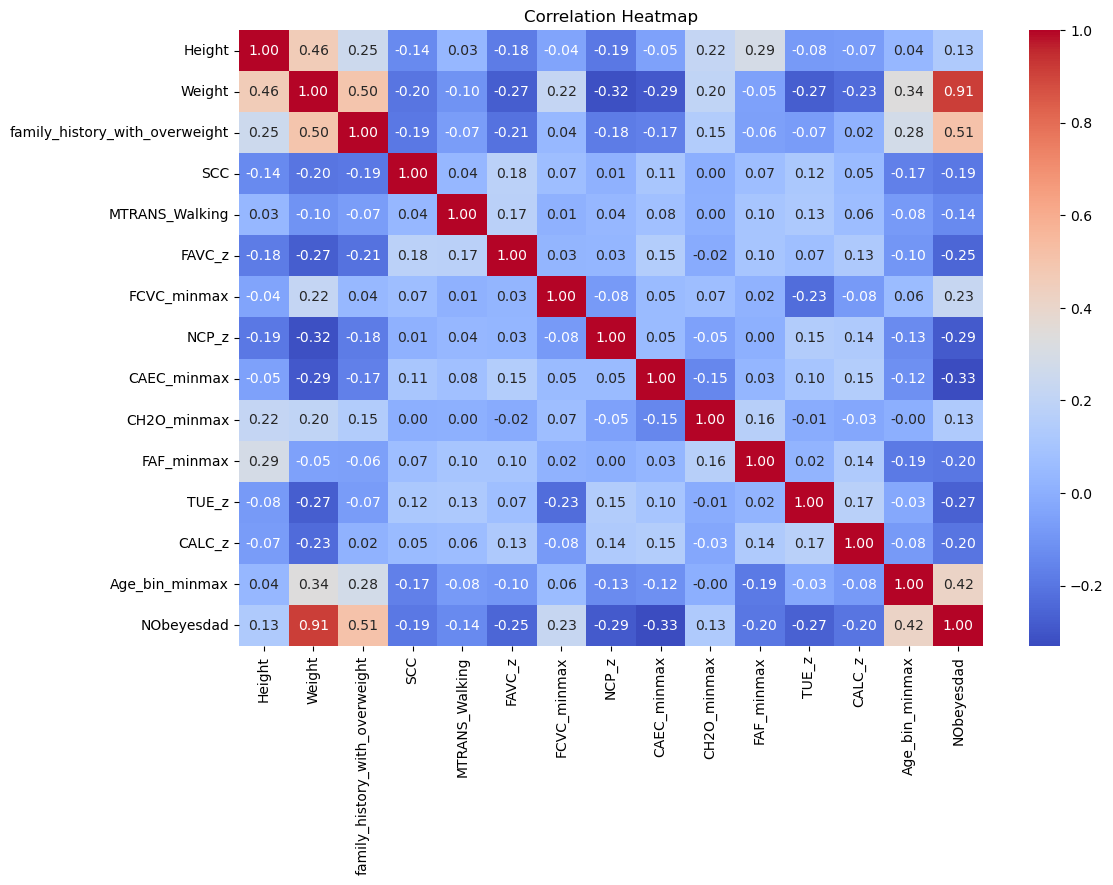

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

### Basic Preprocessing

Below, we process the raw obesity dataset data in the same manner as Mr. Amine in his Kaggle notebook. Note we also preprocessed the data slightly differently ourselves, but for the purpose of a direct comparison, we adhered to his preprocessing steps to ensure consistency in the evaluation of our approach against his implementation. 

In [122]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os 

par_working_dir = "/Users/musatahir/CS2060/Multiclass-Classification-Algorithm" #change to your parent directory 
os.chdir(par_working_dir)
print("Current working directory:", os.getcwd())

df = pd.read_csv("./data/raw/obesity_dataset.csv")
df.drop_duplicates(inplace=True)
df.shape
df['BMI'] = df['Weight'] / (df['Height'] ** 2) #add BMI feature


Current working directory: /Users/musatahir/CS2060/Multiclass-Classification-Algorithm


In the next cell, we test our one-vs-all and all-pairs implementations against scikit-learn's built-in multiclass classification methods to evaluate our performance and compare the results.

In [128]:
import pytest
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

X = df.drop(columns="NObeyesdad").values
y = df.NObeyesdad.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Initialize the scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def test_one_vs_all_accuracy(X_train_scaled, X_test_scaled, y_train, y_test):
    n_classes = len(np.unique(y))
    n_features = X_train_scaled.shape[1]
    batch_size = 1
    # Scikit-learn One-vs-All
    scikit_one_vs_all = OneVsRestClassifier(LogisticRegression(penalty=None))
    scikit_one_vs_all.fit(X_train_scaled, y_train)
    scikit_accuracy = scikit_one_vs_all.score(X_test_scaled, y_test)

    # Custom One-vs-All
    custom_one_vs_all = OneVsAllLogisticRegression(
        n_classes=n_classes,
        binary_classifier_class=BinaryLogisticRegression,
        n_features=n_features,
        batch_size=batch_size,
        random_state=42,
        max_epochs=1500,
    )
    custom_one_vs_all.train(X_train_scaled, y_train)
    custom_accuracy = custom_one_vs_all.accuracy(X_test_scaled, y_test)

    assert abs(scikit_accuracy - custom_accuracy) < 0.01, (
        f"Accuracy mismatch: Scikit {scikit_accuracy}, Custom {custom_accuracy}"
    )
    print("test_one_vs_all_accuracy passed")
    print(scikit_accuracy, custom_accuracy)

def test_all_pairs_accuracy(X_train_scaled, X_test_scaled, y_train, y_test):
    n_classes = len(np.unique(y))
    n_features = X_train_scaled.shape[1]
    batch_size = 1

    # Scikit-learn All-Pairs
    scikit_all_pairs = OneVsOneClassifier(LogisticRegression(penalty=None))
    scikit_all_pairs.fit(X_train_scaled, y_train)
    scikit_accuracy = scikit_all_pairs.score(X_test_scaled, y_test)

    # Custom All-Pairs
    custom_all_pairs = AllPairsLogisticRegression(
        n_classes=n_classes,
        binary_classifier_class=BinaryLogisticRegression,
        n_features=n_features,
        batch_size=batch_size,
        random_state=42,
        max_epochs=2000,
    )
    custom_all_pairs.train(X_train_scaled, y_train)
    custom_accuracy = custom_all_pairs.accuracy(X_test_scaled, y_test)

    assert abs(scikit_accuracy - custom_accuracy) < 0.007, (
        f"Accuracy mismatch: Scikit {scikit_accuracy}, Custom {custom_accuracy}"
    )
    print("test_all_pairs_accuracy passed")
    print(scikit_accuracy, custom_accuracy)


test_one_vs_all_accuracy(X_train_scaled, X_test_scaled, y_train, y_test)
test_all_pairs_accuracy(X_train_scaled, X_test_scaled, y_train, y_test)


test_one_vs_all_accuracy passed
0.7403100775193798 0.7461240310077519
test_all_pairs_accuracy passed
0.9593023255813954 0.9534883720930233


In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier , OneVsOneClassifier


X = df.drop(columns="NObeyesdad").values
y = df.NObeyesdad.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


# Initialize the scaler
scaler = MinMaxScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



scikit_one_vs_all = OneVsRestClassifier(LogisticRegression(penalty=None))
scikit_one_vs_all.fit(X_train_scaled, y_train)
print(f"One-vs-all Accuracy (default parameters Sckit): {scikit_one_vs_all.score(X_test_scaled, y_test):.4f}")


#params
n_classes = len(np.unique(y))
n_features = X_train_scaled.shape[1]
batch_size = 1

custom_one_vs_all = OneVsAllLogisticRegression(n_classes=n_classes, binary_classifier_class=BinaryLogisticRegression,
            n_features=n_features,
            batch_size=batch_size,
            random_state=42, max_epochs=1000)
custom_one_vs_all.train(X_train_scaled, y_train)
print(f"One-vs-all Accuracy (custom): {custom_one_vs_all.accuracy(X_test_scaled, y_test):.4f}")




custom_all_pairs = AllPairsLogisticRegression(n_classes=n_classes, binary_classifier_class=BinaryLogisticRegression,
            n_features=n_features,
            batch_size=batch_size,
            random_state=42, max_epochs=2000)

custom_all_pairs.train(X_train_scaled, y_train)
print(f"All-Pairs Accuracy (custom): {custom_all_pairs.accuracy(X_test_scaled, y_test):.4f}")


scikit_all_pairs = OneVsOneClassifier(LogisticRegression(penalty=None))
scikit_all_pairs.fit(X_train_scaled, y_train)
print(f"All-Pairs Accuracy (default parameters Scikit): {scikit_all_pairs.score(X_test_scaled, y_test):.4f}")






Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/py

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/py

OvR_LR: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lr',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=100000,
                                                                  penalty=None,
                                                                  solver='saga')))])
OvO_LR: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lr',
                 OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000,
                                                                 penalty=None,
                                                                 solver='saga')))])
OvR_LR: 0.7508143567369545
OvO_LR: 0.957747988405868


/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data2060/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [110]:
#Original Raw Data



pipelines = {
    'OvR_LR': Pipeline([
        ("scaler", MinMaxScaler()),
        ("lr", OneVsRestClassifier(LogisticRegression(penalty=None)))
    ]),
    'OvO_LR': Pipeline([
        ("scaler", MinMaxScaler()),
        ("lr", OneVsOneClassifier(LogisticRegression(penalty=None)))
    ])
}

param_grids = {
    'OvR_LR': {
        'lr__estimator__max_iter': [100, 1000, 100000, 10000],
        'lr__estimator__solver': ['lbfgs', 'saga']
    },
    'OvO_LR': {
        'lr__estimator__max_iter': [100, 1000, 100000, 10000],
        'lr__estimator__solver': ['lbfgs', 'saga']
    }
}


best_estimators = {}
best_scores = {}

f1 = make_scorer(f1_score, average='macro')
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, verbose=True, refit=True, n_jobs=-1, scoring=f1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_

for name, estimator in best_estimators.items():
    print(f"{name}: {estimator}")

for name, score in best_scores.items():
    print(f"{name}: {score}")








One-vs-all Accuracy (default parameters Sckit): 0.7403
One-vs-all Accuracy (custom): 0.7461
All-Pairs Accuracy (custom): 0.9535
All-Pairs Accuracy (default parameters Scikit): 0.9593


In [113]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import KFold
import numpy as np




# Initialize the scaler
scaler = MinMaxScaler()

# Scale the training and test data
X_scaled = scaler.fit_transform(X)


def cross_validate(model_class, params, X, y, k=5):
    """
    Perform k-fold cross-validation for a given model and parameters.
    @param model_class: The model class to instantiate.
    @param params: Parameters to initialize the model.
    @param X: Training features.
    @param y: Training labels.
    @param k: Number of folds.
    @return: Mean accuracy across folds.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Instantiate and train the model
        model = model_class(**params)
        model.train(X_train, y_train)

        # Evaluate on the validation set
        score = model.accuracy(X_val, y_val)
        fold_scores.append(score)

    return np.mean(fold_scores)

# Example usage:
# Suppose you know the number of classes and number of features
n_classes = len(np.unique(y))
n_features = X.shape[1]

params = {
    'n_classes': n_classes,
    'binary_classifier_class': BinaryLogisticRegression,
    'n_features': n_features,
    'batch_size': 1,
    'max_epochs': 2000,
    'random_state': 42
}

all_pairs_mean_accuracy = cross_validate(AllPairsLogisticRegression, params, X_scaled, y, k=5)
print("Mean Accuracy via Cross-Validation (All-Pairs):", all_pairs_mean_accuracy)
one_vs_all_mean_accuracy = cross_validate(OneVsAllLogisticRegression, params, X_scaled, y, k=5)
print("Mean Accuracy via Cross-Validation (One-vs-all):", one_vs_all_mean_accuracy)


Mean Accuracy via Cross-Validation (All-Pairs): 0.9340487552598793
Mean Accuracy via Cross-Validation (One-vs-all): 0.7473224570394226


## Confusion Matrix 

In [11]:
import os
#par_working_dir = "/Users/musatahir/CS2060/Multiclass-Classification-Algorithm"
par_working_dir = "/Users/samirbusuladzic/DATA2060-Fall2024/Multiclass-Classification-Algorithm"

os.chdir(par_working_dir)
print("Current working directory:", os.getcwd())

import pandas as pd
from src.one_vs_all import OneVsAllLogisticRegression
from src.all_pairs import AllPairsLogisticRegression
from src.binary_logistic_regression import BinaryLogisticRegression
from sklearn.model_selection import train_test_split
import random
import numpy as np

Current working directory: /Users/samirbusuladzic/DATA2060-Fall2024/Multiclass-Classification-Algorithm


{np.int64(0): 0, np.int64(1): 1, np.int64(2): 2, np.int64(3): 3, np.int64(4): 4, np.int64(5): 5, np.int64(6): 6}


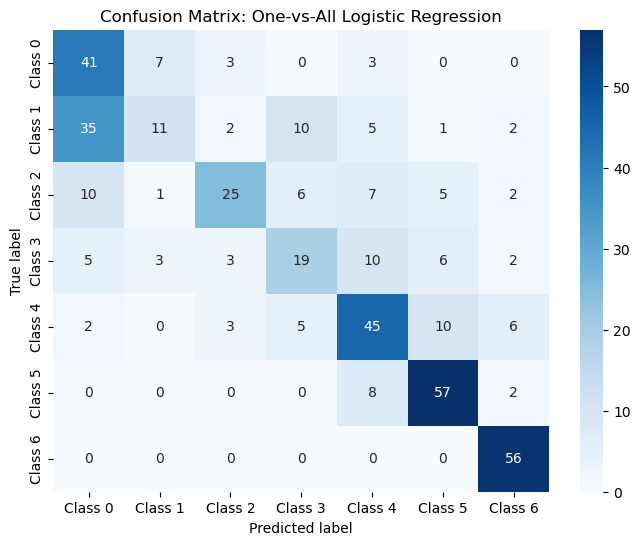

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("./data/raw/obesity_dataset.csv")  # Replace with your dataset file path

X = data.drop("NObeyesdad", axis=1).values  # Features
y = data["NObeyesdad"].values  # Labels

encoder = LabelEncoder()
y = encoder.fit_transform(y)

print(dict(zip(encoder.classes_, range(len(encoder.classes_)))))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_classes = len(np.unique(y_train))
n_features = X_train.shape[1]

ova_model = OneVsAllLogisticRegression(
    n_classes=n_classes,
    binary_classifier_class=BinaryLogisticRegression,
    n_features=n_features,
    batch_size=32,
    max_epochs=100,
    conv_threshold=1e-4,
    random_state=42,
)

ova_model.train(X_train, y_train)
y_pred = ova_model.predict(X_test)

def compute_confusion_matrix(y_true, y_pred, n_classes):
    """
    Computes the confusion matrix for multi-class classification.
    """
    conf_matrix = np.zeros((n_classes, n_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        conf_matrix[t, p] += 1
    return conf_matrix


conf_matrix = compute_confusion_matrix(y_test, y_pred, n_classes)

def plot_confusion_matrix(conf_matrix, class_names, title="Confusion Matrix"):
    """
    Visualizes the confusion matrix using a heatmap.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()


class_names = [f"Class {i}" for i in range(n_classes)]

plot_confusion_matrix(conf_matrix, class_names, title="Confusion Matrix: One-vs-All Logistic Regression")

This confusion matrix represents the performance of a One-vs-All Logistic Regression model across multiple classes. The rows correspond to the true labels (ground truth), and the columns correspond to the predicted labels. The diagonal values indicate correct classifications, while off-diagonal values represent misclassifications. For instance, Class 0 has 41 correct predictions but is misclassified as other classes (e.g., 7 times as Class 1). The intensity of the color indicates the number of instances, with darker shades reflecting higher counts. This visualization helps identify which classes are most accurately predicted and where the model struggles, indicating areas for potential improvement in classification accuracy.

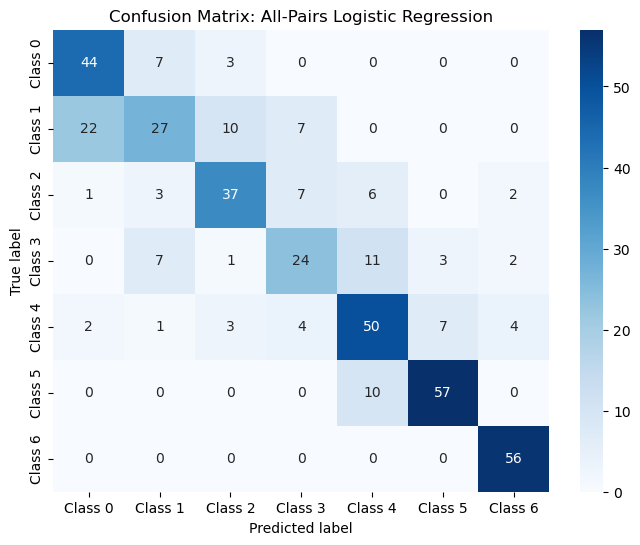

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n_classes = len(np.unique(y_train))
n_features = X_train.shape[1]

all_pairs_model = AllPairsLogisticRegression(
    n_classes=n_classes,
    binary_classifier_class=BinaryLogisticRegression,
    n_features=n_features,
    batch_size=32,
    max_epochs=100,
    conv_threshold=1e-4,
    random_state=42,
)

all_pairs_model.train(X_train, y_train)

y_pred = all_pairs_model.predict(X_test)

def compute_confusion_matrix(y_true, y_pred, n_classes):
    """
    Computes the confusion matrix for multi-class classification.
    """
    conf_matrix = np.zeros((n_classes, n_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        conf_matrix[t, p] += 1
    return conf_matrix

conf_matrix = compute_confusion_matrix(y_test, y_pred, n_classes)

def plot_confusion_matrix(conf_matrix, class_names, title="Confusion Matrix"):
    """
    Visualizes the confusion matrix using a heatmap.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

class_names = [f"Class {i}" for i in range(n_classes)]

plot_confusion_matrix(conf_matrix, class_names, title="Confusion Matrix: All-Pairs Logistic Regression")

The confusion matrix for the All-Pairs Logistic Regression model highlights its strengths and limitations. The model performs well for distinct classes like Class 0, Class 4, and Class 6, where most predictions are correctly classified along the diagonal. However, it struggles with classes that have overlapping feature distributions, such as Class 1 and Class 0, or Class 4 and Class 3, leading to notable misclassifications. This is a result of the voting mechanism inherent in the all-pairs approach, where errors in pairwise comparisons can propagate into the final predictions. While the model effectively leverages pairwise distinctions for well-separated classes, it shows limitations when handling class similarity or imbalance. Overall, the confusion matrix underscores the importance of improving feature separability and addressing class imbalances to enhance the model's accuracy.

# Citations and References 
- Boudinar, A. (2023) Obesity risk prediction. Available at: https://www.kaggle.com/code/boudinar2001/obesity-risk-prediction (Accessed: [Insert date here]).
- Pawara, P., Okafor, E., Groefsema, M., He, S., Schomaker, L.R.B. and Wiering, M.A. (2020). One-vs-One classification for deep neural networks. Pattern Recognition, 108, p.107528. doi:https://doi.org/10.1016/j.patcog.2020.107528.
- Rifkin, R. and Klautau, A. (2004). In Defense of One-Vs-All Classification. Journal of Machine Learning Research, [online] 5, pp.101–141. Available at: https://www.jmlr.org/papers/volume5/rifkin04a/rifkin04a.pdf.